# Introductory Analysis

In [1]:
from pathlib import *
import sqlalchemy as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import axelrod as axl
%matplotlib inline

Size of Database as of writing: 

In [30]:
database_management_sys = sa.create_engine("sqlite:///../database-code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])

(561907, 126)

In [3]:
se_folk_thm_data.head()

,experiment_number,number_of_players,tournament_player_set,player_strategy_name,is_long_run_time,is_stochastic,memory_depth_of_strategy,prob_of_game_ending,payoff_matrix,num_of_repetitions,num_of_equilibria,nash_equilibria,least_prob_of_defection,greatest_prob_of_defection,noise,warning_message
0,0,2,0,Inverse,False,True,Inf,0.001000,3. 0.99159429 1.03362284 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
1,0,2,0,Defector,False,False,0,0.001000,3. 0.99159429 1.03362284 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
2,1,2,0,Inverse,False,True,Inf,0.011081,3. 0.95530245 1.1787902 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
3,1,2,0,Defector,False,False,0,0.011081,3. 0.95530245 1.1787902 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
4,2,2,0,Inverse,False,True,Inf,0.021162,3. 0.9212484 1.31500641 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None


### Summary Statistics

In [4]:
se_folk_thm_data.describe()

,experiment_number,number_of_players,tournament_player_set,prob_of_game_ending,num_of_repetitions,num_of_equilibria,least_prob_of_defection,greatest_prob_of_defection,noise
count,561907.000000,561907.000000,561907.000000,561907.000000,561907.0,561281.000000,561281.000000,561281.000000,561907.000000
mean,83682.991047,4.552976,75.577599,0.499994,500.0,1.703665,0.364125,0.471742,0.498133
std,37706.556008,1.357407,34.279970,0.290997,0.0,1.635716,0.476635,0.492053,0.316122
min,0.000000,2.000000,0.000000,0.001000,500.0,1.000000,0.000000,0.000000,0.000000
25%,55744.000000,4.000000,50.000000,0.242939,500.0,1.000000,0.000000,0.000000,0.200000
50%,89190.000000,5.000000,81.000000,0.494960,500.0,1.000000,0.000000,0.000000,0.500000
75%,116071.000000,6.000000,105.000000,0.746980,500.0,1.000000,1.000000,1.000000,0.800000
max,139200.000000,7.000000,126.000000,0.999000,500.0,39.000000,1.000000,1.000000,1.000000


The average number of players per tournament in the experiment is 5 players.

The probabilities of the game ending is centred around p = 0.5.

The average number of Nash equilibria calculated from the payoff matrices is 2, with the majority of games having 1 - 3 equilibria. However, what is interesting here is that at least one game obtained 39 equilibria (as can be seen from the table above). A further search regarding this will be executed later.

The mean for the least probability of defection in any one game is 0.364125 and for the greatest probability of defection it is 0.471742. However, both probabilities have yielded a value of 0 and 1 over the experiment. 

### Strategy Statistics

In [23]:
strategy_data = se_folk_thm_data[["tournament_player_set", "player_strategy_name", "is_stochastic", "is_long_run_time", "memory_depth_of_strategy"]].drop_duplicates()
strategy_data.head()

,tournament_player_set,player_strategy_name,is_stochastic,is_long_run_time,memory_depth_of_strategy
0,0,Inverse,True,False,Inf
1,0,Defector,False,False,0
2200,1,ALLCorALLD,True,False,1
2201,1,Defector,False,False,0
4400,2,Handshake,False,False,Inf


In [7]:
strategy_counts = strategy_data["player_strategy_name"].value_counts()
strategy_counts.head(), strategy_counts.tail()

(Defector                              127
 GTFT: 0.33                              6
 ZD-GEN-2: 0.125, 0.5, 3                 6
 DoubleResurrection                      5
 Meta Winner Memory One: 34 players      5
 Name: player_strategy_name, dtype: int64,
 TF1                                                1
 Suspicious Tit For Tat                             1
 Evolved FSM 16                                     1
 Memory Decay: 0.1, 0.03, -2, 1, Tit For Tat, 15    1
 Arrogant QLearner                                  1
 Name: player_strategy_name, dtype: int64)

In [21]:
len(strategy_counts[strategy_counts == 1]), len(strategy_data["player_strategy_name"].drop_duplicates())

(65, 175)

Excluding the defector, the strategies which appeared the most (6 times) are GTFT: 0.33 and ZD-GEN-2: 0.125, 0.5, 3. On the other hand 65 out of the 175 strategies executed in this experiment appeared only once. Next, these counts will be plotted with regards to the players characteristics to see if there is any overarching bias that needs to be taken into account.

In [34]:
strategy_data["is_stochastic"].value_counts()

False    377
True     137
Name: is_stochastic, dtype: int64

In [35]:
strategy_data["is_long_run_time"].value_counts()

False    514
Name: is_long_run_time, dtype: int64

All strategies are not classified as 'long run time' as should be the case from the code written previously. Above this, taking into account that the Defector will be counted 126 times under 'False' (and hence subtracting 125 of these), it can also be seen that there is approximately a 73:27 split in favour of deterministic strategies, with well over half of the strategies entries being 'False'.

In [39]:
strategy_data["memory_depth_of_strategy"].value_counts()

Inf    237
0      132
1       69
2       23
5       17
3       12
10       5
200      4
11       4
6        4
40       3
20       2
4        1
8        1
Name: memory_depth_of_strategy, dtype: int64

The majority of strategies participating in this experiment had either an infinite or no memory depth.

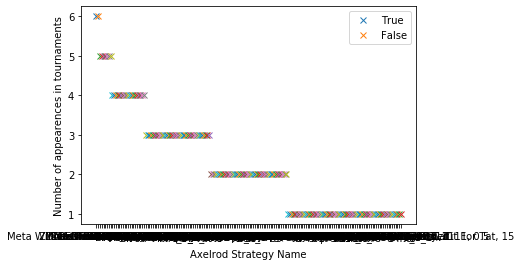

In [65]:
strategy_counts_no_defect = strategy_counts.drop("Defector")
all_labels = [strategy_data[strategy_data["player_strategy_name"] == player]["is_stochastic"] for player in strategy_counts_no_defect.index]
labels = [lab.iloc[0] for lab in all_labels]
graph = plt.figure()
axes = graph.add_subplot(1, 1, 1)
axes.set_xlabel("Axelrod Strategy Name")
axes.set_ylabel("Number of appearences in tournaments")
for strategy_name, count, label in zip(strategy_counts_no_defect.index, strategy_counts_no_defect.values, labels):
    axes.plot(strategy_name, count, "x", label=label)
axes.legend(["True", "False"])
plt.show()

In [20]:
strategy_counts_no_defect_with_label

,player_strategy_name,is_stochastic
"ZD-GEN-2: 0.125, 0.5, 3",6600,28600 True 28602 True 28604 True 2...
GTFT: 0.33,6600,101201 True 101204 True 101207 True 1...
"ZD-GTFT-2: 0.25, 0.5",5500,159501 True 159505 True 159509 True 1...
Handshake,5500,4400 False 4402 False 4404 Fals...
Fortress3,5500,52800 False 52802 False 52804 Fals...
Meta Hunter: 6 players,5500,55000 False 55003 False 55006 Fals...
DoubleResurrection,5500,302501 False 302506 False 302511 Fals...
Tideman and Chieruzzi,5500,97901 False 97904 False 97907 Fals...
Meta Winner Memory One: 34 players,5001,107801 True 107804 True 107807 True 1...
More Tideman and Chieruzzi,4400,216700 False 216704 False 216708 Fals...
